## 探索性分析

Descriptive Statistics for Group 1:
Mean ± Std for Group 1:
reaction times in incongruent stimuli: 757.24 ± 152.37
stroop interference effect: -20.33 ± 74.22
accuracy in Nogo trials: 0.84 ± 0.12
Switching cost: 305.19 ± 295.26
accuracy in 1,750 ms: 0.58 ± 0.26
accuracy in 750 ms: 0.50 ± 0.29
span in digit span backward task: 5.08 ± 1.52


Descriptive Statistics for Group 3:
Mean ± Std for Group 3:
reaction times in incongruent stimuli: 736.82 ± 158.59
stroop interference effect: -26.41 ± 90.34
accuracy in Nogo trials: 0.82 ± 0.13
Switching cost: 314.20 ± 303.06
accuracy in 1,750 ms: 0.52 ± 0.32
accuracy in 750 ms: 0.44 ± 0.32
span in digit span backward task: 4.64 ± 1.58


Descriptive Statistics for Group 2:
Mean ± Std for Group 2:
reaction times in incongruent stimuli: 663.61 ± 149.02
stroop interference effect: -7.04 ± 44.23
accuracy in Nogo trials: 0.88 ± 0.11
Switching cost: 198.95 ± 238.37
accuracy in 1,750 ms: 0.74 ± 0.21
accuracy in 750 ms: 0.66 ± 0.22
span in digit span backwar

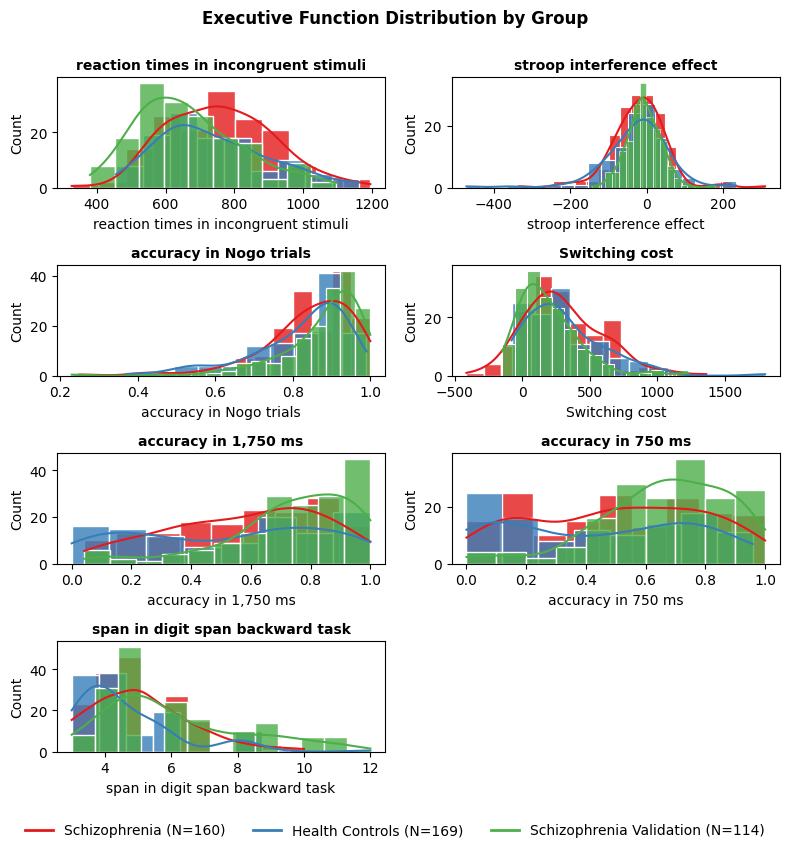


Continuous Variables: Group 1 vs Group 2 Comparisons (t-test with FDR BH correction)
reaction times in incongruent stimuli: t_stat = 5.63, raw p-value = 0.0000, FDR-adjusted p-value = 0.000
stroop interference effect: t_stat = -1.96, raw p-value = 0.0512, FDR-adjusted p-value = 0.051
accuracy in Nogo trials: t_stat = -2.90, raw p-value = 0.0040, FDR-adjusted p-value = 0.005
Switching cost: t_stat = 3.58, raw p-value = 0.0004, FDR-adjusted p-value = 0.001
accuracy in 1,750 ms: t_stat = -6.01, raw p-value = 0.0000, FDR-adjusted p-value = 0.000
accuracy in 750 ms: t_stat = -5.66, raw p-value = 0.0000, FDR-adjusted p-value = 0.000
span in digit span backward task: t_stat = -4.83, raw p-value = 0.0000, FDR-adjusted p-value = 0.000

Continuous Variables: Group 2 vs Group 3 Comparisons (t-test with FDR BH correction)
reaction times in incongruent stimuli: t_stat = -3.90, raw p-value = 0.0001, FDR-adjusted p-value = 0.000
stroop interference effect: t_stat = 2.12, raw p-value = 0.0353, FDR-ad

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy.stats as stats  # 用于统计检验
from statsmodels.stats.multitest import multipletests  # FDR BH校正

# 读取数据
df = pd.read_excel('./raw data/after preprocessing+血液和临床.xlsx')

# 按组分离数据
grouped_data = {group: df[df['Group'] == group] for group in df['Group'].unique()}

continuous_columns = ['reaction times in incongruent stimuli', 'stroop interference effect', 
                      'accuracy in Nogo trials', 'Switching cost', 
                      'accuracy in 1,750 ms', 'accuracy in 750 ms', 
                      'span in digit span backward task']

# ---------------------------
# 描述性统计及均值 ± 标准差
# ---------------------------
for group, data in grouped_data.items():
    print(f"Descriptive Statistics for Group {group}:")
    print(f"Mean ± Std for Group {group}:")
    for col in continuous_columns:
        mean_val = data[col].mean()
        std_val = data[col].std()
        print(f"{col}: {mean_val:.2f} ± {std_val:.2f}")
    print("\n")

# ---------------------------
# 绘图部分：绘制直方图 + KDE
# ---------------------------
# 根据变量数量动态创建子图网格
num_vars = len(continuous_columns)
num_rows = (num_vars + 1) // 2  # 计算行数
num_cols = 2  # 固定列数为2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(8, 2 * num_rows), tight_layout=True)
axs = axs.ravel()

# 自定义调色板（调整颜色顺序）
color_palette = ['#e41a1c', '#377eb8', '#4daf4a']  # 红色, 蓝色, 绿色

# 每组的样本量与标签
group_labels = {
    1: "Schizophrenia (N=160)",
    2: "Health Controls (N=169)",
    3: "Schizophrenia Validation (N=114)"
}

for i, col in enumerate(continuous_columns):
    for j, (group, data) in enumerate(grouped_data.items()):
        sns.histplot(data[col], ax=axs[i], kde=True, 
                     color=color_palette[j], line_kws={"color": "black", "lw": 1.5}, 
                     edgecolor="white", alpha=0.8)
    axs[i].set_title(col, fontsize=10, fontweight="bold")
    axs[i].tick_params(labelsize=10)

# 删除多余的子图
for i in range(num_vars, num_rows * num_cols):
    fig.delaxes(axs[i])

# 添加总的图例，调整位置和边距
handles = [plt.Line2D([0], [0], color=color_palette[j], lw=2) for j in range(len(group_labels))]
fig.legend(handles, group_labels.values(), loc='lower center', fontsize=10, frameon=False,
           ncol=3, bbox_to_anchor=(0.5, -0.05))

plt.suptitle('Executive Function Distribution by Group', fontsize=12, fontweight='bold', y=1.001)
plt.subplots_adjust(hspace=0.4, wspace=0.1, bottom=0.15)  # 调整为合适的间距

# 保存高分辨率图像
plt.savefig("./image/执行功能分布_三组比较.jpg", dpi=600, bbox_inches="tight")
plt.show()

# ---------------------------
# 统计检验：连续变量两两比较（FDR BH矫正）
# ---------------------------
# 定义需要比较的组对
pairs = [(1, 2), (2, 3), (1, 3)]
for (g1, g2) in pairs:
    print(f"\nContinuous Variables: Group {g1} vs Group {g2} Comparisons (t-test with FDR BH correction)")
    pvals = []
    results = {}
    for col in continuous_columns:
        data1 = grouped_data[g1][col].dropna()
        data2 = grouped_data[g2][col].dropna()
        t_stat, p_val = stats.ttest_ind(data1, data2, equal_var=False)
        results[col] = {"t_stat": t_stat, "p_val": p_val}
        pvals.append(p_val)
    reject, pvals_corr, _, _ = multipletests(pvals, alpha=0.05, method='fdr_bh')
    for i, col in enumerate(continuous_columns):
        print(f"{col}: t_stat = {results[col]['t_stat']:.2f}, raw p-value = {results[col]['p_val']:.4f}, FDR-adjusted p-value = {pvals_corr[i]:.3f}")

Continuous Variables (Mean ± Std) by Group:
+-----------------+-------------------------+---------------------------+------------------------------------+
| Variable        | Schizophrenia (N=160)   | Health Controls (N=169)   | Schizophrenia Validation (N=114)   |
+=================+=========================+===========================+====================================+
| Age             | 35.21 ± 9.53            | 37.69 ± 13.71             | 36.46 ± 9.65                       |
+-----------------+-------------------------+---------------------------+------------------------------------+
| Education years | 10.88 ± 4.51            | 10.90 ± 3.94              | 10.71 ± 4.27                       |
+-----------------+-------------------------+---------------------------+------------------------------------+
| BMI             | 23.63 ± 3.78            | 23.95 ± 4.32              | 24.58 ± 4.30                       |
+-----------------+-------------------------+-----------------------

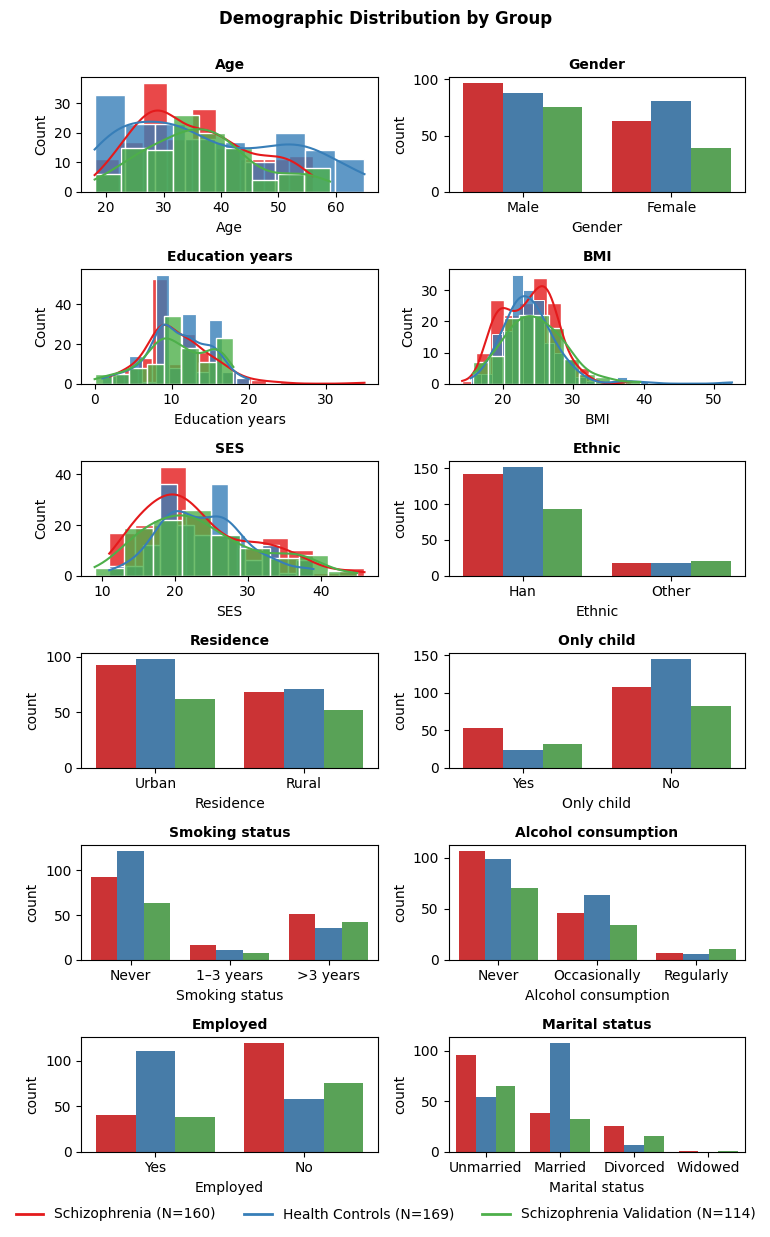


Continuous Variables: Group 1 vs Group 2 Comparisons (t-test with FDR BH correction)
Age: t_stat = -1.913, p-value = 0.057, FDR-adjusted p-value = 0.227
Education years: t_stat = -0.032, p-value = 0.974, FDR-adjusted p-value = 0.974
BMI: t_stat = -0.713, p-value = 0.476, FDR-adjusted p-value = 0.635
SES: t_stat = -0.961, p-value = 0.338, FDR-adjusted p-value = 0.635

Continuous Variables: Group 2 vs Group 3 Comparisons (t-test with FDR BH correction)
Age: t_stat = 0.890, p-value = 0.374, FDR-adjusted p-value = 0.746
Education years: t_stat = 0.370, p-value = 0.711, FDR-adjusted p-value = 0.746
BMI: t_stat = -1.215, p-value = 0.226, FDR-adjusted p-value = 0.746
SES: t_stat = 0.325, p-value = 0.746, FDR-adjusted p-value = 0.746

Continuous Variables: Group 1 vs Group 3 Comparisons (t-test with FDR BH correction)
Age: t_stat = -1.057, p-value = 0.292, FDR-adjusted p-value = 0.583
Education years: t_stat = 0.319, p-value = 0.750, FDR-adjusted p-value = 0.750
BMI: t_stat = -1.900, p-value 

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as sm
import scipy.stats as stats  # 用于统计检验
from tabulate import tabulate  # 用于生成三线表
from statsmodels.stats.multitest import multipletests  # FDR BH校正

# 读取数据
df = pd.read_excel('./raw data/after preprocessing+血液和临床.xlsx')

# 按组分离数据
grouped_data = {group: df[df['Group'] == group] for group in df['Group'].unique()}

# 定义真实的组标签（包含样本量信息）
group_labels = {
    1: "Schizophrenia (N=160)",
    2: "Health Controls (N=169)",
    3: "Schizophrenia Validation (N=114)"
}

demographic_columns = [
    'Age', 'Gender', 'Education years', 'BMI', 'SES',
    'Ethnic', 'Residence', 'Only child',
    'Smoking status', 'Alcohol consumption', 'Employed', 'Marital status'
]

# 分离连续变量与分类变量
continuous_vars = ['Age', 'Education years', 'BMI', 'SES']
categorical_vars = [col for col in demographic_columns if col not in continuous_vars]

# 定义变量重命名字典，用于显示真实名称（仅针对变量名）
rename_dict = {
    'Gender': 'Sex',
    'Ethnic': 'Ethnicity',
    'Smoking status': 'Smoking history',
    'Alcohol consumption': 'Alcohol consumption history'
}

# 定义各分类变量的值映射字典（假设数据为编码形式）
value_mappings = {
    'Gender': {1: 'Male', 2: 'Female'},
    'Ethnic': {1: 'Han', 2: 'Other'},
    'Residence': {1: 'Urban', 2: 'Rural'},
    'Only child': {1: 'Yes', 2: 'No'},
    'Smoking status': {1: 'Never', 2: '1–3 years', 3: '>3 years'},
    'Alcohol consumption': {1: 'Never', 2: 'Occasionally', 3: 'Regularly'},
    'Employed': {1: 'Yes', 2: 'No'},
    'Marital status': {1: 'Unmarried', 2: 'Married', 3: 'Divorced', 4: 'Widowed'}
}

# ================================
# 1. 打印三组合并的描述性统计（三线表）
# -------------------------------
# 连续变量：合并三组的均值 ± 标准差
header = ["Variable"] + [group_labels[g] for g in sorted(grouped_data.keys())]
cont_table = []
for var in continuous_vars:
    row = [var]
    for g in sorted(grouped_data.keys()):
        data = grouped_data[g]
        mean_val = data[var].mean()
        std_val = data[var].std()
        row.append(f"{mean_val:.2f} ± {std_val:.2f}")
    cont_table.append(row)
print("Continuous Variables (Mean ± Std) by Group:")
print(tabulate(cont_table, headers=header, tablefmt="grid"))

# 分类变量：对每个变量，将各类别在三个组中的计数和百分比合并为一张表
for col in categorical_vars:
    # 使用重命名字典显示更真实的变量名称
    col_display = rename_dict.get(col, col)
    # 获取该变量的值映射
    mapping = value_mappings.get(col, {})
    # 获取该变量在整个样本中的所有类别（排除缺失值）
    categories = sorted(df[col].dropna().unique(), key=lambda x: x)
    cat_table = []
    for cat in categories:
        cat_label = mapping.get(cat, cat)
        row = [cat_label]
        for g in sorted(grouped_data.keys()):
            data = grouped_data[g]
            total = data[col].count()
            count = data[col].value_counts().get(cat, 0)
            percentage = (count / total * 100) if total > 0 else 0
            row.append(f"{count} ({percentage:.2f}%)")
        cat_table.append(row)
    header_cat = ["Category"] + [group_labels[g] for g in sorted(grouped_data.keys())]
    print(f"\nCategorical Variable: {col_display}")
    print(tabulate(cat_table, headers=header_cat, tablefmt="grid"))

# ================================
# 2. 绘制人口学变量分布图
# -------------------------------
num_vars = len(demographic_columns)
num_rows = (num_vars + 1) // 2  # 根据变量数量计算行数
num_cols = 2  # 固定列数为2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(7.5, 2 * num_rows), tight_layout=True)
axs = axs.ravel()

# 自定义调色板（调整颜色顺序）
color_palette = ['#e41a1c', '#377eb8', '#4daf4a']  # 红色, 蓝色, 绿色

# 绘制各变量分布：
# - 分类变量用条形图（bars）
# - 连续变量用直方图+核密度估计
for i, col in enumerate(demographic_columns):
    ax = axs[i]
    if col in categorical_vars:  # 分类变量：条形图
        sns.countplot(data=df, x=col, hue='Group', ax=ax, palette=color_palette)
        # 移除每个子图的局部图例
        if ax.get_legend() is not None:
            ax.get_legend().remove()
        # 修改x轴刻度标签，使用真实意思
        if col in value_mappings:
            mapping = value_mappings[col]
            new_labels = []
            for label in ax.get_xticklabels():
                text = label.get_text()
                try:
                    key = int(text)
                except ValueError:
                    key = text
                new_labels.append(mapping.get(key, text))
            ax.set_xticklabels(new_labels)
        ax.set_title(col, fontsize=10, fontweight="bold")
        ax.tick_params(labelsize=10)
    else:  # 连续变量：直方图 + KDE
        for j, (group, data) in enumerate(sorted(grouped_data.items())):
            sns.histplot(data[col], ax=ax, kde=True, 
                         color=color_palette[j],
                         line_kws={"color": "black", "lw": 1.5},
                         edgecolor="white", alpha=0.8)
        ax.set_title(col, fontsize=10, fontweight="bold")
        ax.tick_params(labelsize=10)

# 删除多余的子图（如果有）
for i in range(num_vars, num_rows * num_cols):
    fig.delaxes(axs[i])

# 添加全局图例
handles = [plt.Line2D([0], [0], color=color_palette[i], lw=2) for i in range(len(group_labels))]
fig.legend(handles, list(group_labels.values()), loc='lower center', fontsize=10, frameon=False,
           ncol=3, bbox_to_anchor=(0.5, -0.02))

plt.suptitle('Demographic Distribution by Group', fontsize=12, fontweight='bold', y=1.00)
plt.subplots_adjust(hspace=0.4, wspace=0.1, bottom=0.15)  # 调整布局

# 保存高分辨率图像
plt.savefig("./image/社会人口学分布_三组比较.jpg", dpi=600, bbox_inches="tight")
plt.show()

# ================================
# 3. 差异检验（两两比较，FDR BH校正）
# -------------------------------

# 定义需要比较的组对
pairs = [(1, 2), (2, 3), (1, 3)]

# 3.1 连续变量的比较（使用独立样本 t 检验）
for (g1, g2) in pairs:
    print(f"\nContinuous Variables: Group {g1} vs Group {g2} Comparisons (t-test with FDR BH correction)")
    pvals = []
    results = {}
    for var in continuous_vars:
        data1 = grouped_data[g1][var].dropna()
        data2 = grouped_data[g2][var].dropna()
        t_stat, p_val = stats.ttest_ind(data1, data2, equal_var=False)
        results[var] = {"t_stat": t_stat, "p_val": p_val}
        pvals.append(p_val)
    reject, pvals_corr, _, _ = multipletests(pvals, alpha=0.05, method='fdr_bh')
    for i, var in enumerate(continuous_vars):
        print(f"{var}: t_stat = {results[var]['t_stat']:.3f}, p-value = {results[var]['p_val']:.3f}, FDR-adjusted p-value = {pvals_corr[i]:.3f}")

# 3.2 分类变量的比较（使用卡方检验）
all_cat_vars = ['Gender', 'Ethnic', 'Residence', 'Only child', 'Employed',
                'Smoking status', 'Alcohol consumption', 'Marital status']
for (g1, g2) in pairs:
    print(f"\nCategorical Variables: Group {g1} vs Group {g2} Comparisons (Chi-square test with FDR BH correction)")
    pvals_cat = []
    results_cat = {}
    sub_df = df[df['Group'].isin([g1, g2])]
    for var in all_cat_vars:
        contingency_table = pd.crosstab(sub_df['Group'], sub_df[var])
        chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)
        results_cat[var] = {"chi2": chi2, "p_val": p_val, "dof": dof}
        pvals_cat.append(p_val)
    reject, pvals_cat_corr, _, _ = multipletests(pvals_cat, alpha=0.05, method='fdr_bh')
    for i, var in enumerate(all_cat_vars):
        print(f"{var}: chi2 = {results_cat[var]['chi2']:.3f}, dof = {results_cat[var]['dof']}, p-value = {results_cat[var]['p_val']:.3f}, FDR-adjusted p-value = {pvals_cat_corr[i]:.3f}")

Mean ± Std for each group:
Group 1 (Schizophrenia (N=160)):
  White Blood Cells: 6.09 ± 1.58
  Neutrophils: 57.91 ± 9.70
  Lymphocytes: 33.32 ± 9.34
  Monocytes: 6.25 ± 1.67
  Platelets: 211.29 ± 55.88
  C-Reactive Protein: 6.19 ± 4.44
  Neutrophil-to-Lymphocyte Ratio: 1.99 ± 1.01
  Platelet-to-Lymphocyte Ratio: 114.40 ± 37.82
  Monocyte-to-Lymphocyte Ratio: 0.21 ± 0.10
  Systemic Inflammatory Index: 411.85 ± 206.45


Group 3 (Schizophrenia Validation (N=114)):
  White Blood Cells: 6.43 ± 1.82
  Neutrophils: 58.31 ± 9.08
  Lymphocytes: 33.00 ± 8.63
  Monocytes: 6.03 ± 1.37
  Platelets: 224.02 ± 66.63
  C-Reactive Protein: 4.99 ± 2.84
  Neutrophil-to-Lymphocyte Ratio: 1.98 ± 0.99
  Platelet-to-Lymphocyte Ratio: 115.99 ± 43.54
  Monocyte-to-Lymphocyte Ratio: 0.20 ± 0.10
  Systemic Inflammatory Index: 456.27 ± 295.24




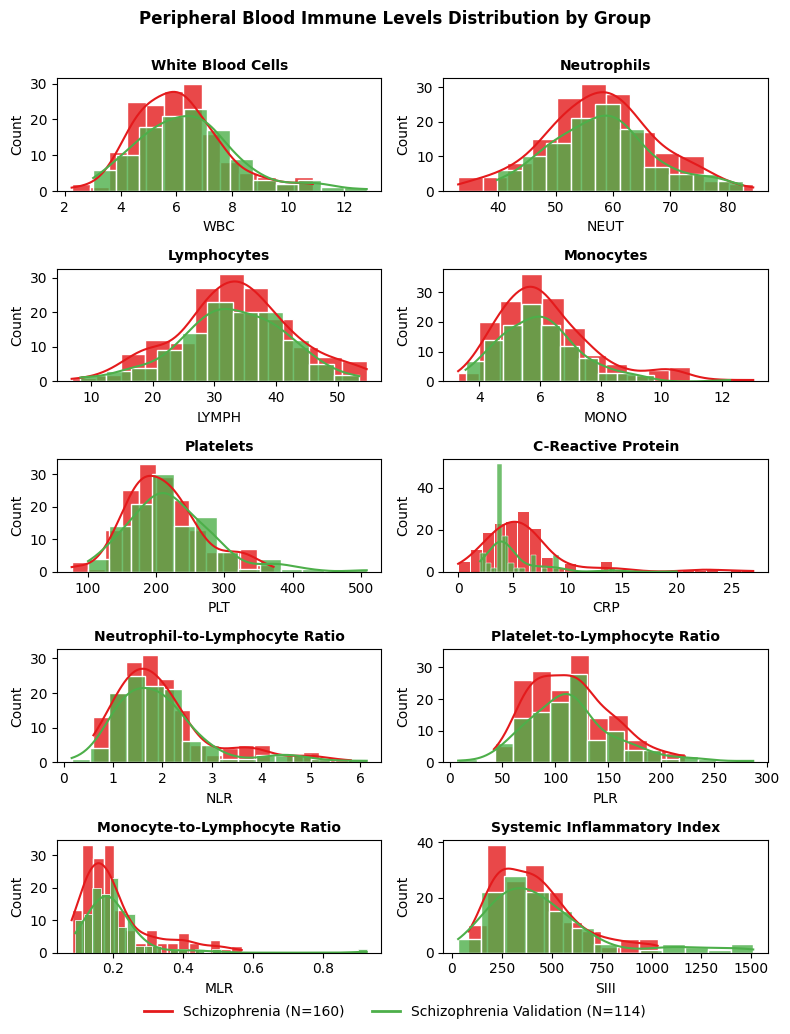

Statistical Tests between Group 1 and Group 3 (t-test with FDR BH correction):
White Blood Cells: FDR-adjusted p-value = 0.373
Neutrophils: FDR-adjusted p-value = 0.857
Lymphocytes: FDR-adjusted p-value = 0.857
Monocytes: FDR-adjusted p-value = 0.444
Platelets: FDR-adjusted p-value = 0.373
C-Reactive Protein: FDR-adjusted p-value = 0.066
Neutrophil-to-Lymphocyte Ratio: FDR-adjusted p-value = 0.905
Platelet-to-Lymphocyte Ratio: FDR-adjusted p-value = 0.857
Monocyte-to-Lymphocyte Ratio: FDR-adjusted p-value = 0.808
Systemic Inflammatory Index: FDR-adjusted p-value = 0.420


In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy.stats as stats  # 用于统计检验
from statsmodels.stats.multitest import multipletests  # FDR BH校正

# 读取数据
df = pd.read_excel('./raw data/after preprocessing+血液和临床.xlsx')

# 按组分离数据，只保留 Group 1 和 Group 3
grouped_data = {group: df[df['Group'] == group] for group in df['Group'].unique() if group in [1, 3]}

# 定义变量的全称
variable_names = {
    'WBC': 'White Blood Cells',
    'NEUT': 'Neutrophils',
    'LYMPH': 'Lymphocytes',
    'MONO': 'Monocytes',
    'PLT': 'Platelets',
    'CRP': 'C-Reactive Protein',
    'NLR': 'Neutrophil-to-Lymphocyte Ratio',
    'PLR': 'Platelet-to-Lymphocyte Ratio',
    'MLR': 'Monocyte-to-Lymphocyte Ratio',
    'SIII': 'Systemic Inflammatory Index'
}

continuous_columns = list(variable_names.keys())


# 额外打印各组的均值 ± 标准差
print("Mean ± Std for each group:")
for group, data in grouped_data.items():
    print(f"Group {group} ({'Schizophrenia (N=160)' if group == 1 else 'Schizophrenia Validation (N=114)'}):")
    for col in continuous_columns:
        mean_val = data[col].mean()
        std_val = data[col].std()
        print(f"  {variable_names[col]}: {mean_val:.2f} ± {std_val:.2f}")
    print("\n")

# 根据变量数量动态创建子图网格
num_vars = len(continuous_columns)
num_rows = (num_vars + 1) // 2  # 计算行数
num_cols = 2  # 固定列数为2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(8, 2 * num_rows), tight_layout=True)
axs = axs.ravel()

# 自定义调色板（调整颜色顺序）
color_palette = ['#e41a1c', '#4daf4a']  # 红色, 蓝色

# 定义组标签（只包含 Group 1 与 Group 3）
group_labels = {
    1: "Schizophrenia (N=160)",
    3: "Schizophrenia Validation (N=114)"
}

for i, col in enumerate(continuous_columns):
    for j, (group, data) in enumerate(sorted(grouped_data.items())):
        sns.histplot(data[col], ax=axs[i], kde=True, 
                     color=color_palette[j], line_kws={"color": "black", "lw": 1.5}, 
                     edgecolor="white", alpha=0.8)
    axs[i].set_title(variable_names[col], fontsize=10, fontweight="bold")
    axs[i].tick_params(labelsize=10)

# 删除多余的子图
for i in range(num_vars, num_rows * num_cols):
    fig.delaxes(axs[i])

# 添加总的图例，调整位置和边距
handles = [plt.Line2D([0], [0], color=color_palette[j], lw=2) for j in range(len(group_labels))]
fig.legend(handles, list(group_labels.values()), loc='lower center', fontsize=10, frameon=False,
           ncol=2, bbox_to_anchor=(0.5, -0.02))

plt.suptitle('Peripheral Blood Immune Levels Distribution by Group', fontsize=12, fontweight='bold', y=1.001)
plt.subplots_adjust(hspace=0.4, wspace=0.1, bottom=0.15)  # 调整为合适的间距

# 保存高分辨率图像
plt.savefig("./image/外周血液免疫分布_三组比较.jpg", dpi=600, bbox_inches="tight")
plt.show()

# ================================
# 统计检验：Group 1 vs Group 3（连续变量 t 检验，FDR BH 校正）
# ================================
print("Statistical Tests between Group 1 and Group 3 (t-test with FDR BH correction):")
pvals = []
results = {}
for col in continuous_columns:
    data1 = grouped_data[1][col].dropna()
    data3 = grouped_data[3][col].dropna()
    t_stat, p_val = stats.ttest_ind(data1, data3, equal_var=False)
    results[col] = p_val
    pvals.append(p_val)
reject, pvals_corr, _, _ = multipletests(pvals, alpha=0.05, method='fdr_bh')
for i, col in enumerate(continuous_columns):
    print(f"{variable_names[col]}: FDR-adjusted p-value = {pvals_corr[i]:.3f}")


Mean ± Std for each group:

Group 1 (Schizophrenia (N=160)):
  AST/ALT Ratio: 1.03 ± 0.47
  Lactate Dehydrogenase: 151.15 ± 25.24
  Creatine Kinase: 95.42 ± 91.27
  Triglycerides: 1.53 ± 0.72
  Cholesterol: 3.95 ± 0.81
  High-Density Lipoprotein Cholesterol: 1.15 ± 0.26
  Low-Density Lipoprotein Cholesterol: 2.48 ± 0.68

Group 3 (Schizophrenia Validation (N=114)):
  AST/ALT Ratio: 1.05 ± 0.49
  Lactate Dehydrogenase: 155.24 ± 21.07
  Creatine Kinase: 91.72 ± 46.64
  Triglycerides: 1.56 ± 0.68
  Cholesterol: 3.79 ± 0.54
  High-Density Lipoprotein Cholesterol: 1.10 ± 0.24
  Low-Density Lipoprotein Cholesterol: 2.36 ± 0.53


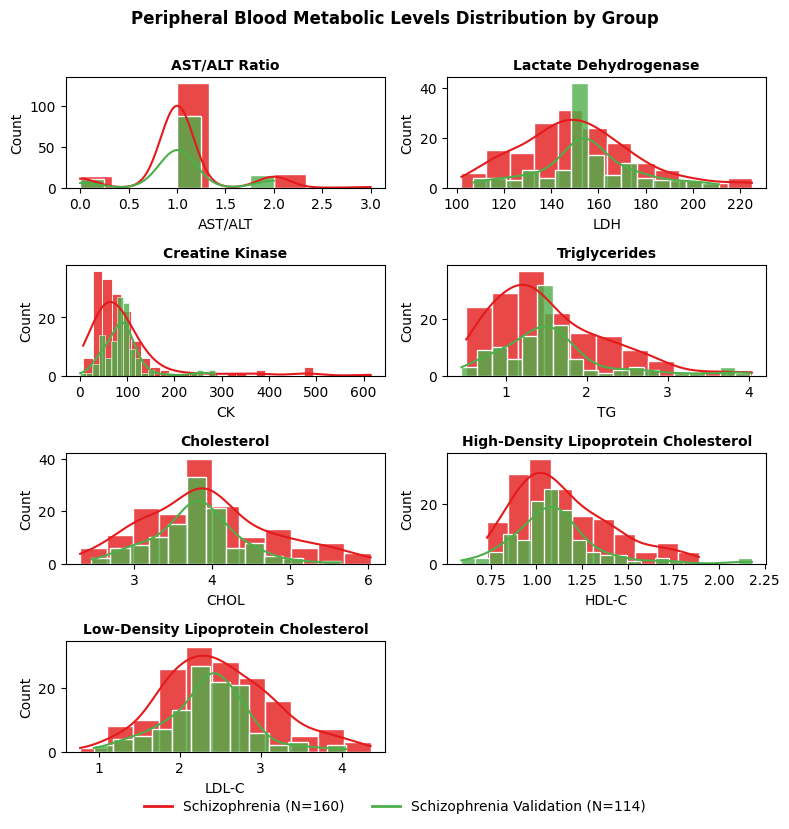


Statistical Tests between Group 1 and Group 3 (t-test with FDR BH correction):
AST/ALT Ratio:  FDR-adjusted p-value = 0.811
Lactate Dehydrogenase:  FDR-adjusted p-value = 0.255
Creatine Kinase:  FDR-adjusted p-value = 0.811
Triglycerides:  FDR-adjusted p-value = 0.811
Cholesterol:  FDR-adjusted p-value = 0.255
High-Density Lipoprotein Cholesterol:  FDR-adjusted p-value = 0.255
Low-Density Lipoprotein Cholesterol:  FDR-adjusted p-value = 0.255


In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy.stats as stats  # 用于统计检验
from statsmodels.stats.multitest import multipletests  # FDR BH校正

# 读取数据
df = pd.read_excel('./raw data/after preprocessing+血液和临床.xlsx')

# 按组分离数据，只保留 Group 1 和 Group 3
grouped_data = {group: df[df['Group'] == group] for group in df['Group'].unique() if group in [1, 3]}

# 定义变量的全称
variable_names = {
    'AST/ALT': 'AST/ALT Ratio',
    'LDH': 'Lactate Dehydrogenase',
    'CK': 'Creatine Kinase',
    'TG': 'Triglycerides',
    'CHOL': 'Cholesterol',
    'HDL-C': 'High-Density Lipoprotein Cholesterol',
    'LDL-C': 'Low-Density Lipoprotein Cholesterol'
}

continuous_columns = list(variable_names.keys())

# ---------------------------
# 描述性统计及均值 ± 标准差打印

    
print("\nMean ± Std for each group:")
for group, data in grouped_data.items():
    label = "Schizophrenia (N=160)" if group == 1 else "Schizophrenia Validation (N=114)"
    print(f"\nGroup {group} ({label}):")
    for col in continuous_columns:
        mean_val = data[col].mean()
        std_val = data[col].std()
        print(f"  {variable_names[col]}: {mean_val:.2f} ± {std_val:.2f}")

# ---------------------------
# 绘图部分：绘制直方图+KDE
# ---------------------------
num_vars = len(continuous_columns)
num_rows = (num_vars + 1) // 2  # 计算行数
num_cols = 2  # 固定列数为2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(8, 2 * num_rows), tight_layout=True)
axs = axs.ravel()

# 自定义调色板（调整颜色顺序）
color_palette = ['#e41a1c', '#4daf4a']  # 红色, 蓝色

# 定义组标签
group_labels = {
    1: "Schizophrenia (N=160)",
    3: "Schizophrenia Validation (N=114)"
}

for i, col in enumerate(continuous_columns):
    for j, (group, data) in enumerate(sorted(grouped_data.items())):
        sns.histplot(data[col], ax=axs[i], kde=True, 
                     color=color_palette[j], line_kws={"color": "black", "lw": 1.5},
                     edgecolor="white", alpha=0.8)
    axs[i].set_title(variable_names[col], fontsize=10, fontweight="bold")
    axs[i].tick_params(labelsize=10)

# 删除多余的子图
for i in range(num_vars, num_rows * num_cols):
    fig.delaxes(axs[i])

# 添加总的图例
handles = [plt.Line2D([0], [0], color=color_palette[j], lw=2) for j in range(len(group_labels))]
fig.legend(handles, list(group_labels.values()), loc='lower center', fontsize=10, frameon=False,
           ncol=2, bbox_to_anchor=(0.5, -0.02))

plt.suptitle('Peripheral Blood Metabolic Levels Distribution by Group', fontsize=12, fontweight='bold', y=1.001)
plt.subplots_adjust(hspace=0.4, wspace=0.1, bottom=0.15)  # 调整布局

# 保存图像
plt.savefig("./image/外周血液代谢分布_三组比较.jpg", dpi=600, bbox_inches="tight")
plt.show()

# ---------------------------
# 统计检验：Group 1 vs Group 3 的连续变量比较（t 检验 + FDR BH校正）
# ---------------------------
print("\nStatistical Tests between Group 1 and Group 3 (t-test with FDR BH correction):")
pvals = []
results = {}
for col in continuous_columns:
    data1 = grouped_data[1][col].dropna()
    data3 = grouped_data[3][col].dropna()
    t_stat, p_val = stats.ttest_ind(data1, data3, equal_var=False)
    results[col] = p_val
    pvals.append(p_val)
reject, pvals_corr, _, _ = multipletests(pvals, alpha=0.05, method='fdr_bh')
for i, col in enumerate(continuous_columns):
    print(f"{variable_names[col]}:  FDR-adjusted p-value = {pvals_corr[i]:.3f}")

/var/folders/hj/sn71kqzs57x2snf3yz30cg1w0000gn/T/ipykernel_93861/411704178.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[continuous_columns] = data[continuous_columns].apply(pd.to_numeric, errors='coerce')
/var/folders/hj/sn71kqzs57x2snf3yz30cg1w0000gn/T/ipykernel_93861/411704178.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[continuous_columns] = data[continuous_columns].apply(pd.to_numeric, errors='coerce')


Mean ± Std for each group:

Group 1 (Schizophrenia (N=160)):
  PANSS Negative: 21.19 ± 6.83
  PANSS Positive: 21.66 ± 4.53
  PANSS General: 39.73 ± 7.09
  PANSS Total: 82.58 ± 14.46
  MAMD24 Anxiety/Somatization: 2.34 ± 1.48
  MAMD24 Cognitive Impairment: 2.93 ± 1.73
  MAMD24 Diurnal Variation: 0.03 ± 0.21
  MAMD24 Retardation: 3.64 ± 1.74
  MAMD24 Sleep Disturbance: 1.60 ± 1.18
  MAMD24 Despair: 1.31 ± 1.57
  HAMD24 Total: 11.85 ± 4.59
  HAMA14 Total: 4.28 ± 3.36
  HAMA14 Psychic Anxiety: 3.66 ± 1.92
  HAMA14 Somatic Anxiety: 0.62 ± 2.35
  BRMS Total: 7.71 ± 3.68

Group 3 (Schizophrenia Validation (N=114)):
  PANSS Negative: 23.19 ± 9.50
  PANSS Positive: 20.58 ± 8.06
  PANSS General: 37.89 ± 13.23
  PANSS Total: 81.66 ± 27.78
  MAMD24 Anxiety/Somatization: 1.94 ± 1.90
  MAMD24 Cognitive Impairment: 2.42 ± 1.90
  MAMD24 Diurnal Variation: 0.06 ± 0.24
  MAMD24 Retardation: 3.18 ± 2.01
  MAMD24 Sleep Disturbance: 1.40 ± 0.96
  MAMD24 Despair: 1.48 ± 1.82
  HAMD24 Total: 10.48 ± 5.17
  H

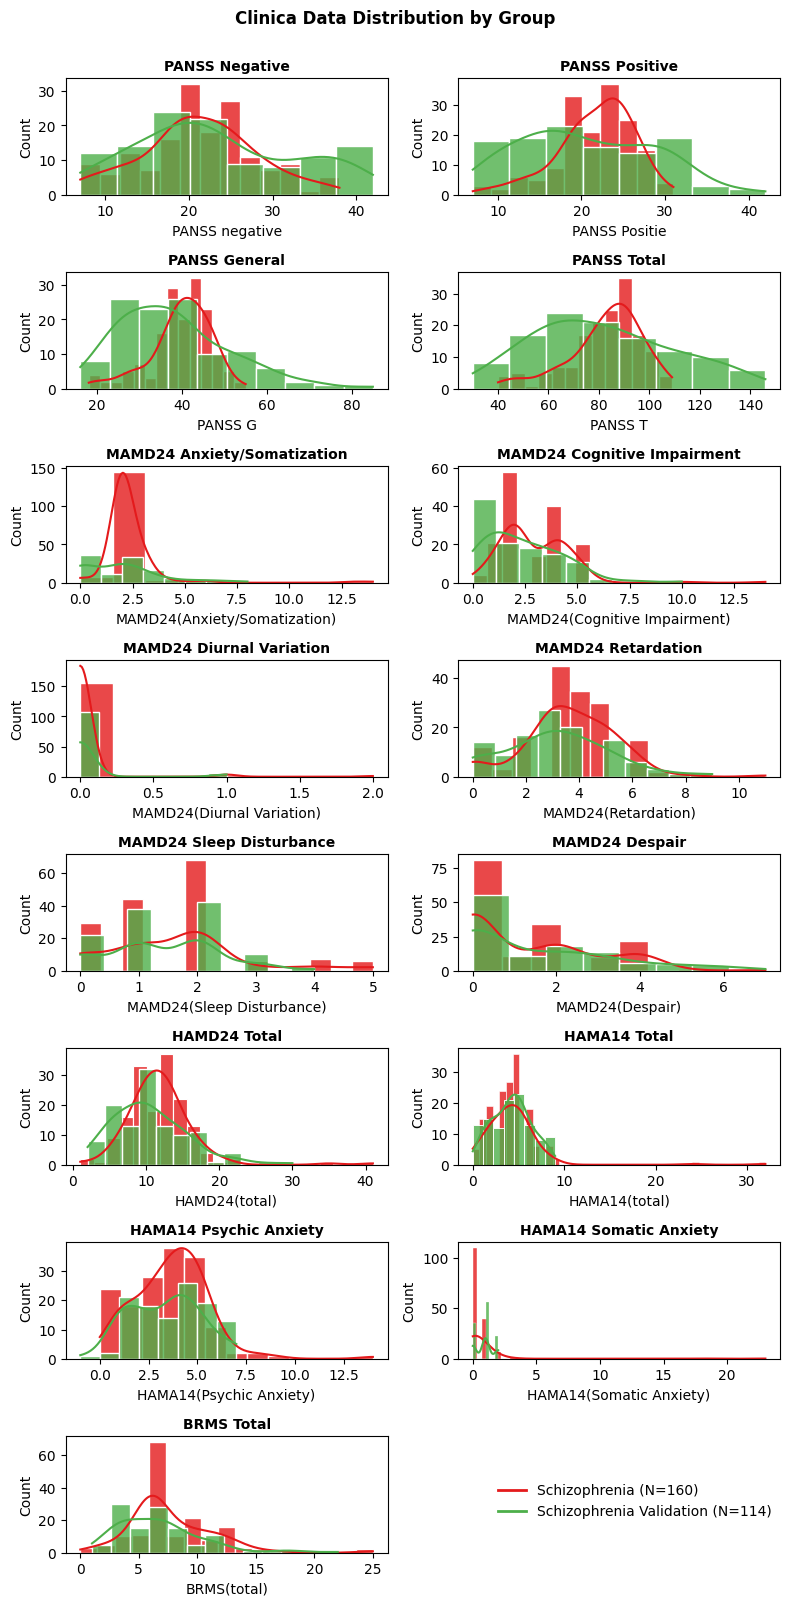


Statistical Tests between Group 1 and Group 3 (t-test with FDR BH correction):
PANSS Negative: t_stat = -1.92, raw p-value = 0.0563, FDR-adjusted p-value = 0.156
PANSS Positive: t_stat = 1.30, raw p-value = 0.1967, FDR-adjusted p-value = 0.268
PANSS General: t_stat = 1.35, raw p-value = 0.1782, FDR-adjusted p-value = 0.267
PANSS Total: t_stat = 0.32, raw p-value = 0.7457, FDR-adjusted p-value = 0.799
MAMD24 Anxiety/Somatization: t_stat = 1.87, raw p-value = 0.0626, FDR-adjusted p-value = 0.156
MAMD24 Cognitive Impairment: t_stat = 2.28, raw p-value = 0.0237, FDR-adjusted p-value = 0.126
MAMD24 Diurnal Variation: t_stat = -1.08, raw p-value = 0.2812, FDR-adjusted p-value = 0.351
MAMD24 Retardation: t_stat = 2.01, raw p-value = 0.0454, FDR-adjusted p-value = 0.156
MAMD24 Sleep Disturbance: t_stat = 1.52, raw p-value = 0.1304, FDR-adjusted p-value = 0.267
MAMD24 Despair: t_stat = -0.84, raw p-value = 0.4031, FDR-adjusted p-value = 0.465
HAMD24 Total: t_stat = 2.26, raw p-value = 0.0247, 

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy.stats as stats  # 用于统计检验
from statsmodels.stats.multitest import multipletests  # FDR BH校正

# 读取数据
df = pd.read_excel('./raw data/after preprocessing+血液和临床.xlsx')

# 按组分离数据，只保留 Group 1 和 Group 3
grouped_data = {group: df[df['Group'] == group] 
                for group in df['Group'].unique() if group in [1, 3]}

# 变量名字改为新的名称
variable_names = {
    'PANSS negative': 'PANSS Negative',
    'PANSS Positie': 'PANSS Positive',
    'PANSS G': 'PANSS General',
    'PANSS T': 'PANSS Total',
    'MAMD24(Anxiety/Somatization)': 'MAMD24 Anxiety/Somatization',
    'MAMD24(Cognitive Impairment)': 'MAMD24 Cognitive Impairment',
    'MAMD24(Diurnal Variation)': 'MAMD24 Diurnal Variation',
    'MAMD24(Retardation)': 'MAMD24 Retardation',
    'MAMD24(Sleep Disturbance)': 'MAMD24 Sleep Disturbance',
    'MAMD24(Despair)': 'MAMD24 Despair',
    'HAMD24(total)': 'HAMD24 Total',
    'HAMA14(total)': 'HAMA14 Total',
    'HAMA14(Psychic Anxiety)': 'HAMA14 Psychic Anxiety',
    'HAMA14(Somatic Anxiety)': 'HAMA14 Somatic Anxiety',
    'BRMS(total)': 'BRMS Total',
}

continuous_columns = list(variable_names.keys())

# 确保数据为数值类型，并删除含 NaN 的行
for group, data in grouped_data.items():
    data[continuous_columns] = data[continuous_columns].apply(pd.to_numeric, errors='coerce')
    grouped_data[group] = data.dropna(subset=continuous_columns)

# ---------------------------
# 新增均值 ± 标准差打印
# ---------------------------
print("Mean ± Std for each group:")
for group, data in grouped_data.items():
    label = "Schizophrenia (N=160)" if group == 1 else "Schizophrenia Validation (N=114)"
    print(f"\nGroup {group} ({label}):")
    for col in continuous_columns:
        mean_val = data[col].mean()
        std_val = data[col].std()
        print(f"  {variable_names[col]}: {mean_val:.2f} ± {std_val:.2f}")

# ---------------------------
# 绘图部分：绘制直方图 + KDE
# ---------------------------
num_vars = len(continuous_columns)
num_rows = (num_vars + 1) // 2  # 计算行数
num_cols = 2  # 固定2列
fig, axs = plt.subplots(num_rows, num_cols, figsize=(8, 2 * num_rows), tight_layout=True)
axs = axs.ravel()

# 自定义调色板（调整颜色顺序）
color_palette = ['#e41a1c', '#4daf4a']  # 分别对应 Group 1 和 Group 3

# 定义组标签
group_labels = {
    1: "Schizophrenia (N=160)",
    3: "Schizophrenia Validation (N=114)"
}

for i, col in enumerate(continuous_columns):
    for j, (group, data) in enumerate(sorted(grouped_data.items())):
        sns.histplot(data[col], ax=axs[i], kde=True, 
                     color=color_palette[j], line_kws={"color": "black", "lw": 1.5},
                     edgecolor="white", alpha=0.8)
    axs[i].set_title(variable_names[col], fontsize=10, fontweight="bold")
    axs[i].tick_params(labelsize=10)

# 删除多余的子图
for i in range(num_vars, num_rows * num_cols):
    fig.delaxes(axs[i])

# 添加总的图例，调整位置和边距
handles = [plt.Line2D([0], [0], color=color_palette[j], lw=2) for j in range(len(group_labels))]
fig.legend(handles, list(group_labels.values()), loc='lower center', fontsize=10, frameon=False,
           ncol=1, bbox_to_anchor=(0.8, 0.05))

plt.suptitle('Clinica Data Distribution by Group', fontsize=12, fontweight='bold', y=1.001)
plt.subplots_adjust(hspace=0.4, wspace=0.1, bottom=0.15)
plt.savefig("./image/Clinical_and_Metabolic_Distribution_Groups_Comparison-临床量表.jpg", dpi=600, bbox_inches="tight")
plt.show()

# ---------------------------
# 统计检验：Group 1 vs Group 3 的连续变量 t 检验（Welch 方法）+ FDR BH 校正
# ---------------------------
print("\nStatistical Tests between Group 1 and Group 3 (t-test with FDR BH correction):")
pvals = []
results = {}
for col in continuous_columns:
    data1 = grouped_data[1][col].dropna()
    data3 = grouped_data[3][col].dropna()
    t_stat, p_val = stats.ttest_ind(data1, data3, equal_var=False)
    results[col] = {"t_stat": t_stat, "p_val": p_val}
    pvals.append(p_val)

reject, pvals_corr, _, _ = multipletests(pvals, alpha=0.05, method='fdr_bh')
for i, col in enumerate(continuous_columns):
    print(f"{variable_names[col]}: t_stat = {results[col]['t_stat']:.2f}, raw p-value = {results[col]['p_val']:.4f}, FDR-adjusted p-value = {pvals_corr[i]:.3f}")

/var/folders/hj/sn71kqzs57x2snf3yz30cg1w0000gn/T/ipykernel_93861/509562904.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_data[group].loc[:, continuous_columns] = grouped_data[group].loc[:, continuous_columns].apply(pd.to_numeric, errors='coerce')
/var/folders/hj/sn71kqzs57x2snf3yz30cg1w0000gn/T/ipykernel_93861/509562904.py:34: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  grouped_data[group].loc[:, continuous_columns] = grouped_data[group].loc[:, continuous_columns].apply(pd.to_numeric, errors='coerce')
/var/

Mean ± Standard Deviation for Continuous Variables:

Group 1 (Schizophrenia (N=160)):
  Dose Equivalent to Olanzapine (mg/day): 14.79 ± 6.48
  Frequency of Episodes: 6.18 ± 4.30
  Age of Onset: 27.25 ± 8.42
  Duration of Illness (years): 9.78 ± 7.02

Group 3 (Schizophrenia Validation (N=114)):
  Dose Equivalent to Olanzapine (mg/day): 13.68 ± 5.66
  Frequency of Episodes: 5.00 ± 3.34
  Age of Onset: 25.94 ± 8.51
  Duration of Illness (years): 11.40 ± 7.85

Descriptive Statistics for Group 1 (Categorical):
First Episode:
  Yes: 154 (96.25%)
  No: 6 (3.75%)
Family History of Psychiatric Disorders:
  Yes: 132 (82.50%)
  No: 28 (17.50%)



Descriptive Statistics for Group 3 (Categorical):
First Episode:
  Yes: 103 (91.15%)
  No: 10 (8.85%)
Family History of Psychiatric Disorders:
  Yes: 101 (89.38%)
  No: 12 (10.62%)




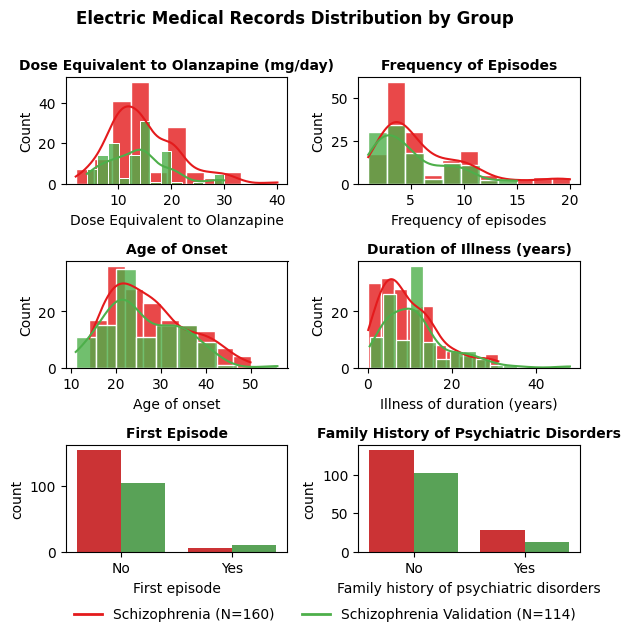


Statistical Tests for Continuous Variables (Group 1 vs Group 3, t-test with FDR BH correction):
Dose Equivalent to Olanzapine (mg/day): t_stat = 1.51, raw p-value = 0.1331, FDR-adjusted p-value = 0.177
Frequency of Episodes: t_stat = 2.55, raw p-value = 0.0113, FDR-adjusted p-value = 0.045
Age of Onset: t_stat = 1.26, raw p-value = 0.2090, FDR-adjusted p-value = 0.209
Duration of Illness (years): t_stat = -1.76, raw p-value = 0.0800, FDR-adjusted p-value = 0.160

Statistical Tests for Categorical Variables (Group 1 vs Group 3, Chi-square test with FDR BH correction):
First Episode: chi2 = 2.21, dof = 1, raw p-value = 0.1373, FDR-adjusted p-value = 0.150
Family History of Psychiatric Disorders: chi2 = 2.07, dof = 1, raw p-value = 0.1505, FDR-adjusted p-value = 0.150


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy.stats as stats  # 用于统计检验
from statsmodels.stats.multitest import multipletests  # FDR BH校正

# 读取数据
df = pd.read_excel('./raw data/after preprocessing+血液和临床.xlsx')

# 按组分离数据，只保留 Group 1 和 Group 3
grouped_data = {group: df[df['Group'] == group] 
                for group in df['Group'].unique() if group in [1, 3]}

# 变量名字改为新的名称
variable_names = {
    'Dose Equivalent to Olanzapine': 'Dose Equivalent to Olanzapine (mg/day)',
    'Frequency of episodes': 'Frequency of Episodes',
    'Age of onset': 'Age of Onset',
    'Illness of duration (years)': 'Duration of Illness (years)',
    'First episode': 'First Episode',
    'Family history of psychiatric disorders': 'Family History of Psychiatric Disorders'
}

# 定义连续变量和分类变量
continuous_columns = ['Dose Equivalent to Olanzapine', 'Frequency of episodes', 'Age of onset', 'Illness of duration (years)']
categorical_columns = ['First episode', 'Family history of psychiatric disorders']

# ---------------------------
# 数据预处理
# ---------------------------
# 对连续变量：转换为数值并删除含 NaN 的行
for group in grouped_data.keys():
    grouped_data[group].loc[:, continuous_columns] = grouped_data[group].loc[:, continuous_columns].apply(pd.to_numeric, errors='coerce')
    grouped_data[group] = grouped_data[group].dropna(subset=continuous_columns)

# 对分类变量：转换为数值（0/1）并删除含 NaN 的行
for group in grouped_data.keys():
    grouped_data[group].loc[:, categorical_columns] = grouped_data[group].loc[:, categorical_columns].apply(pd.to_numeric, errors='coerce')
    grouped_data[group] = grouped_data[group].dropna(subset=categorical_columns)

# ---------------------------
# 描述性统计
# ---------------------------
print("Mean ± Standard Deviation for Continuous Variables:")
for group, data in grouped_data.items():
    label = "Schizophrenia (N=160)" if group == 1 else "Schizophrenia Validation (N=114)"
    print(f"\nGroup {group} ({label}):")
    for col in continuous_columns:
        mean_val = data[col].mean()
        std_val = data[col].std()
        print(f"  {variable_names[col]}: {mean_val:.2f} ± {std_val:.2f}")

# 分类变量：打印各类别的计数与百分比（假定类别为 0 和 1，其中 1 表示 Yes）
for group, data in grouped_data.items():
    print(f"\nDescriptive Statistics for Group {group} (Categorical):")
    for col in categorical_columns:
        print(f"{variable_names[col]}:")
        counts = data[col].value_counts().sort_index()
        total = counts.sum()
        for val, count in counts.items():
            perc = count / total * 100
            label = 'Yes' if val == 1 else 'No'
            print(f"  {label}: {count} ({perc:.2f}%)")
    print("\n")

# ---------------------------
# 绘图部分：连续和分类变量绘制在同一图中
# ---------------------------
# 合并连续与分类变量列表（先连续，后分类）
all_vars = continuous_columns + categorical_columns
total_vars = len(all_vars)
num_cols_all = 2
num_rows_all = (total_vars + num_cols_all - 1) // num_cols_all

fig, axs = plt.subplots(num_rows_all, num_cols_all, figsize=(6, 2*num_rows_all), tight_layout=True)
axs = axs.ravel()

# 自定义调色板：对应 Group 1 与 Group 3
color_palette = ['#e41a1c', '#4daf4a']
group_labels = {1: "Schizophrenia (N=160)", 3: "Schizophrenia Validation (N=114)"}

# 合并分类变量绘图用的数据
combined_df = df[df['Group'].isin([1, 3])]

for i, col in enumerate(all_vars):
    if col in continuous_columns:
        # 连续变量：绘制直方图 + KDE
        for j, (group, data) in enumerate(sorted(grouped_data.items())):
            sns.histplot(data[col], ax=axs[i], kde=True, 
                         color=color_palette[j],
                         line_kws={"color": "black", "lw": 1.5},
                         edgecolor="white", alpha=0.8)
        axs[i].set_title(variable_names[col], fontsize=10, fontweight="bold")
        axs[i].tick_params(labelsize=10)
    else:
        # 分类变量：绘制条形图（countplot），并删除局部图例
        sns.countplot(data=combined_df, x=col, hue='Group', ax=axs[i], palette=color_palette)
        if axs[i].get_legend() is not None:
            axs[i].get_legend().remove()
        axs[i].set_title(variable_names[col], fontsize=10, fontweight="bold")
        axs[i].tick_params(labelsize=10)
        # 将 x 轴刻度标签改为 'No' 和 'Yes'
        axs[i].set_xticklabels(['No', 'Yes'])

# 删除多余子图
for i in range(total_vars, len(axs)):
    fig.delaxes(axs[i])

# 添加全局图例
handles = [plt.Line2D([0], [0], color=color_palette[j], lw=2) for j in range(len(group_labels))]
fig.legend(handles, list(group_labels.values()), loc='lower center', fontsize=10, frameon=False,
           ncol=2, bbox_to_anchor=(0.55, -0.04))
           
plt.suptitle('Electric Medical Records Distribution by Group', fontsize=12, fontweight='bold', y=1.001)
plt.subplots_adjust(hspace=0.4, wspace=0.1, bottom=0.15)
plt.savefig("./image/Clinical_and_Metabolic_Distribution_Groups_Comparison-电子病历.jpg", dpi=600, bbox_inches="tight")
plt.show()

# ---------------------------
# 统计检验
# ---------------------------
# 连续变量：Group 1 vs Group 3（Welch t 检验 + FDR BH 校正）
print("\nStatistical Tests for Continuous Variables (Group 1 vs Group 3, t-test with FDR BH correction):")
pvals_cont = []
results_cont = {}
for col in continuous_columns:
    data1 = grouped_data[1][col].dropna()
    data3 = grouped_data[3][col].dropna()
    t_stat, p_val = stats.ttest_ind(data1, data3, equal_var=False)
    results_cont[col] = {"t_stat": t_stat, "p_val": p_val}
    pvals_cont.append(p_val)
reject_cont, pvals_corr_cont, _, _ = multipletests(pvals_cont, alpha=0.05, method='fdr_bh')
for i, col in enumerate(continuous_columns):
    print(f"{variable_names[col]}: t_stat = {results_cont[col]['t_stat']:.2f}, raw p-value = {results_cont[col]['p_val']:.4f}, FDR-adjusted p-value = {pvals_corr_cont[i]:.3f}")

# 分类变量：Group 1 vs Group 3（卡方检验 + FDR BH 校正）
print("\nStatistical Tests for Categorical Variables (Group 1 vs Group 3, Chi-square test with FDR BH correction):")
pvals_cat = []
results_cat = {}
for col in categorical_columns:
    sub_df = df[df['Group'].isin([1, 3])]
    contingency_table = pd.crosstab(sub_df['Group'], sub_df[col])
    chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)
    results_cat[col] = {"chi2": chi2, "p_val": p_val, "dof": dof}
    pvals_cat.append(p_val)
reject_cat, pvals_corr_cat, _, _ = multipletests(pvals_cat, alpha=0.05, method='fdr_bh')
for i, col in enumerate(categorical_columns):
    print(f"{variable_names[col]}: chi2 = {results_cat[col]['chi2']:.2f}, dof = {results_cat[col]['dof']}, raw p-value = {results_cat[col]['p_val']:.4f}, FDR-adjusted p-value = {pvals_corr_cat[i]:.3f}")